In [62]:
# Loading libraries
%matplotlib inline
import matplotlib.pyplot as plt
#settinging the dimension of graph
plt.rcParams["figure.figsize"]= (12, 7)

import pandas as pd
import numpy as np
import seaborn as sns

from pandas.tools.plotting import scatter_matrix

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import Imputer
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [63]:

df= "C:\\Users\\Race-class18\\Downloads\\bank.csv"
dataset = pd.read_csv(df)
print ('done')

done


In [64]:
#data exploration
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 423.9+ KB


In [65]:
#checking for the missing values
dataset.apply(lambda x: sum(x.isnull()),axis=0)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [66]:
print(dataset.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [67]:
# Impute outliers function
def impute_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [68]:
#lets see statistic of Numerical variables before Outlier treatment
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


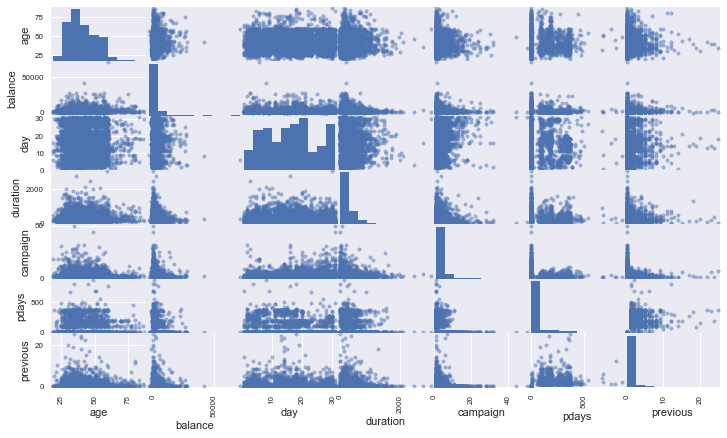

In [69]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

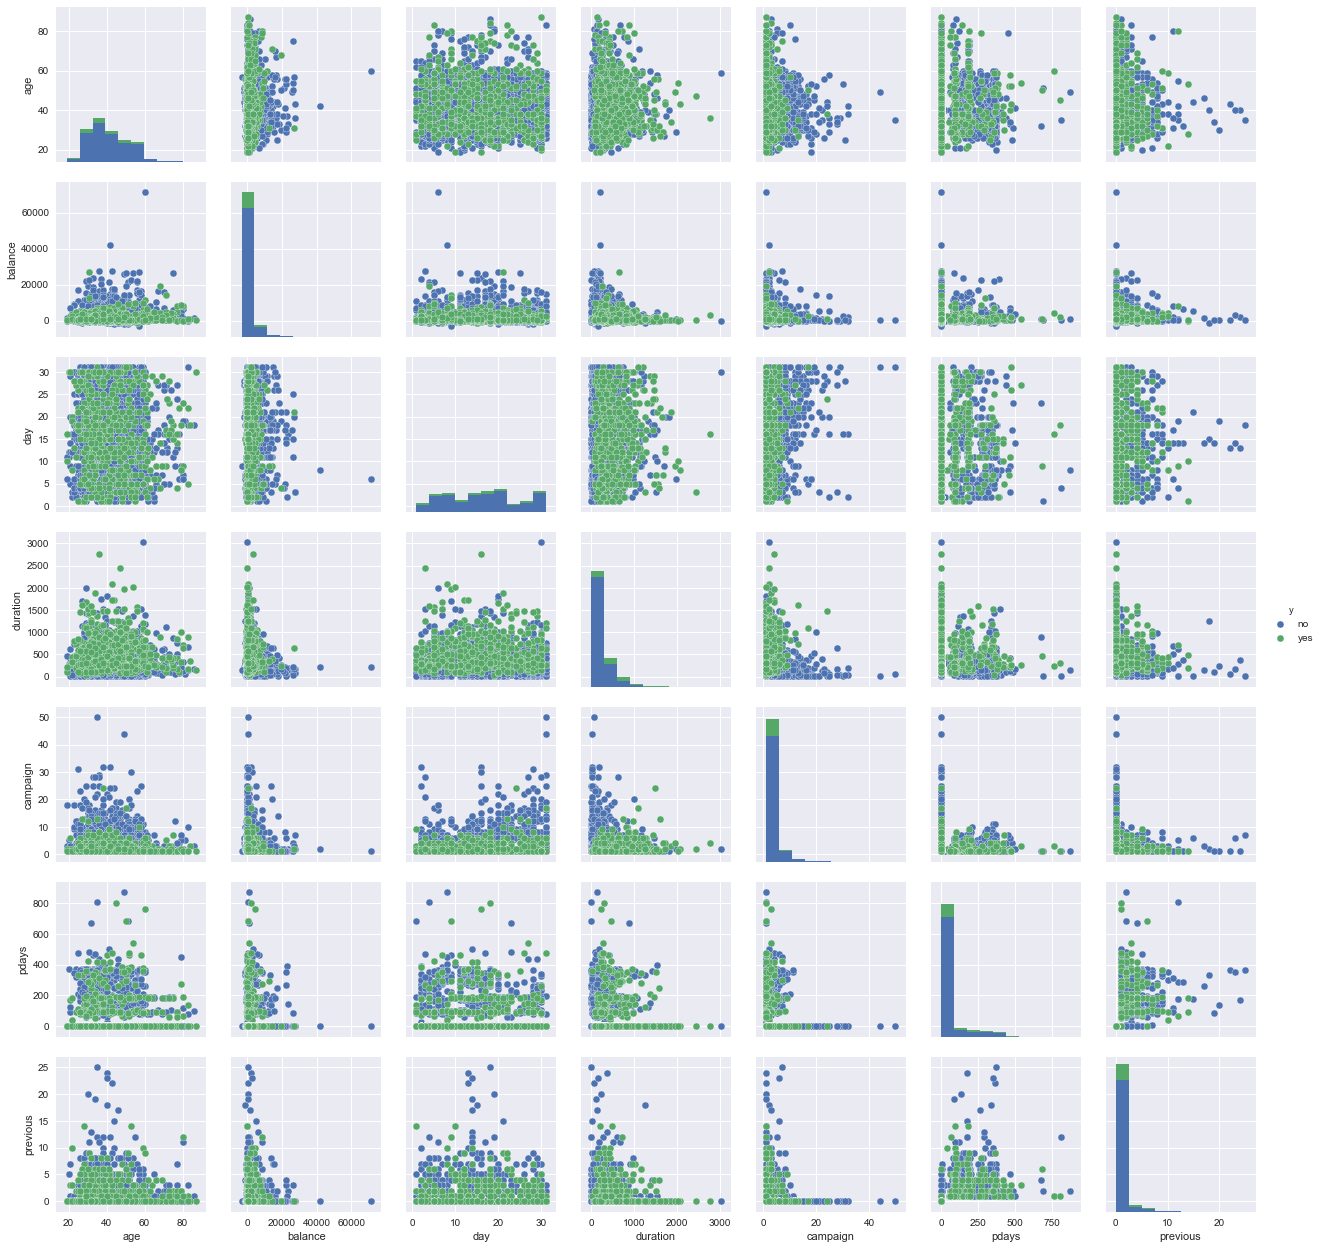

In [70]:
sns.pairplot(dataset, hue="y");

In [71]:
# Fixing balance column
dataset_new = dataset
min_val = dataset_new["balance"].min()
max_val = 20000
dataset_new = impute_outliers(df=dataset_new, column='balance' , minimum=min_val, maximum=max_val)

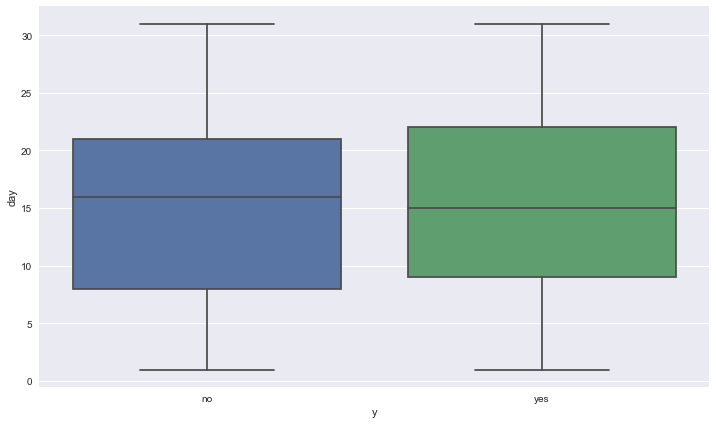

In [72]:
sns.boxplot(x='y', y='day', data=dataset)

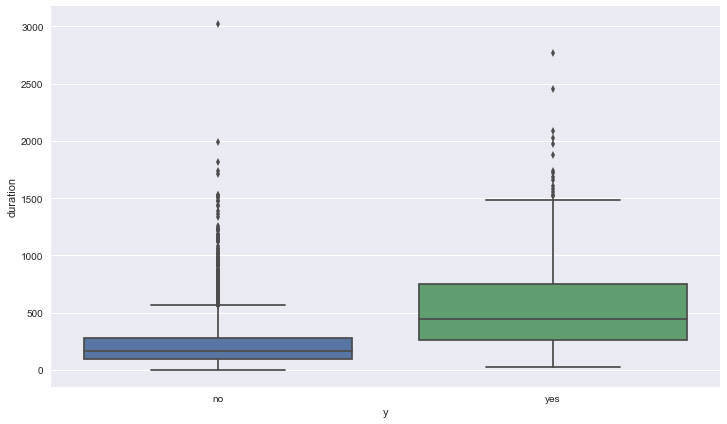

In [73]:
sns.boxplot(x='y', y='duration', data=dataset)

In [74]:
# Fixing duration column
min_val = dataset_new["duration"].min()
max_val = 2000
dataset_new = impute_outliers(df=dataset_new, column='duration' , minimum=min_val, maximum=max_val)

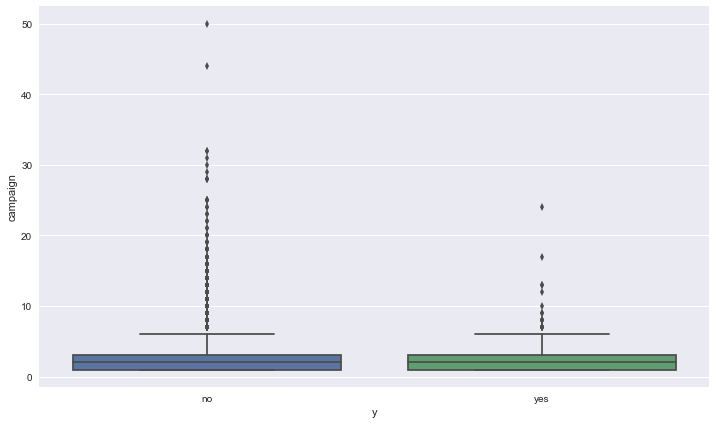

In [75]:
sns.boxplot(x='y', y='campaign', data=dataset)

In [76]:
# Fixing campaign column
min_val = dataset_new["campaign"].min()
max_val = 20
dataset_new = impute_outliers(df=dataset_new, column='campaign' , minimum=min_val, maximum=max_val)

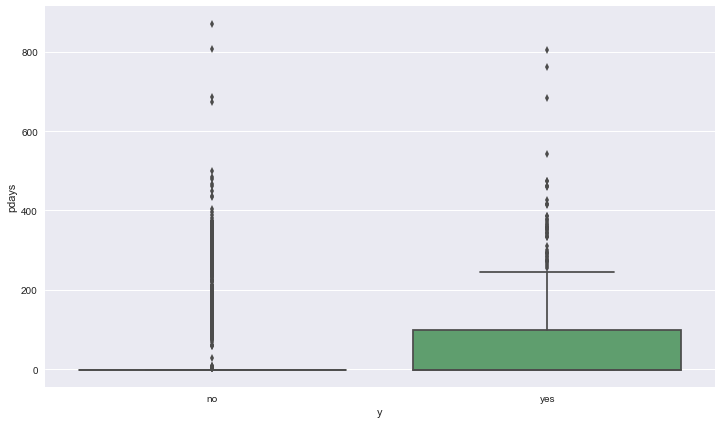

In [77]:
sns.boxplot(x='y', y='pdays', data=dataset)

In [78]:
# Fixing pdays column
min_val = dataset_new["pdays"].min()
max_val = 250
dataset_new = impute_outliers(df=dataset_new, column='pdays' , minimum=min_val, maximum=max_val)

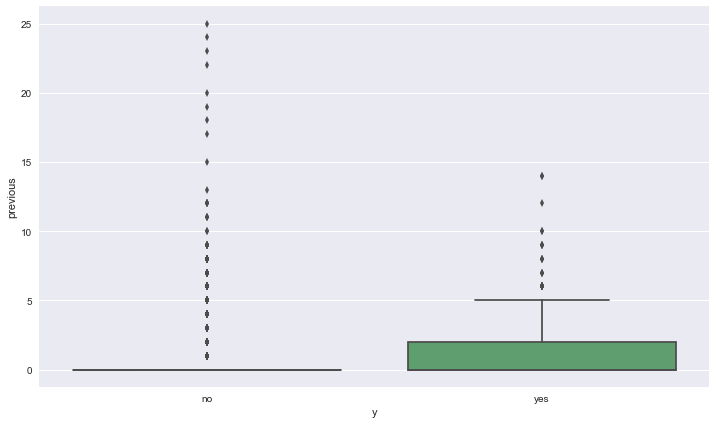

In [79]:
sns.boxplot(x='y', y='previous', data=dataset)

In [80]:

min_val = dataset_new["previous"].min()
max_val = 15
dataset_new = impute_outliers(df=dataset_new, column='previous' , minimum=min_val, maximum=max_val)

In [81]:
dataset_new.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1307.736376,15.915284,261.517984,2.667165,17.585046,0.506379
std,10.576211,2349.708938,8.247667,248.911664,2.503986,48.484726,1.453564
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1445.000000,21.000000,328.000000,3.000000,-1.000000,0.000000
max,87.000000,19447.000000,31.000000,1994.000000,20.000000,250.000000,15.000000


In [82]:
# Impute unknowns function, since unknoown values are high
def impute_unknowns(df, column):
    col_values = df[column].values
    df[column] = np.where(col_values=='unknown', dataset[column].mode(), col_values)
    return df

job
admin.           10.572882
blue-collar      20.924574
entrepreneur      3.715992
housemaid         2.477328
management       21.433311
retired           5.087370
self-employed     4.047777
services          9.223623
student           1.857996
technician       16.987392
unemployed        2.831232
unknown           0.840522
dtype: float64


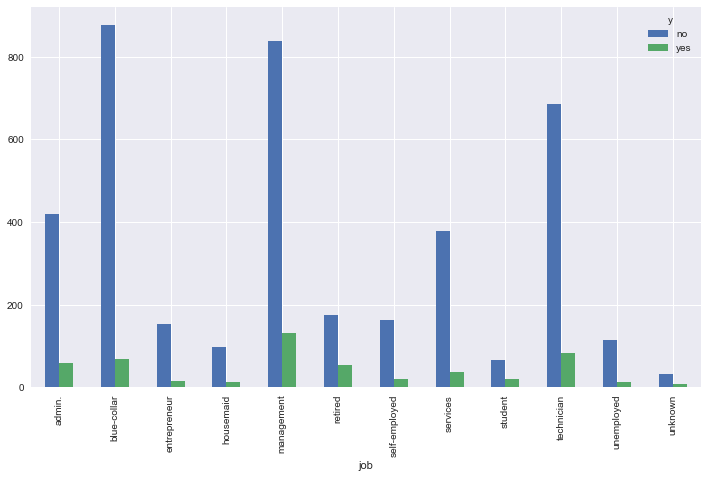

In [83]:
# condering the job variable
temp1 = pd.crosstab(dataset['job'], dataset['y'])
temp1.plot(kind='bar')
print(dataset.groupby(['job']).size()/len(dataset)*100) 

In [84]:
# Fixing 'job' column
dataset_new = impute_unknowns(df=dataset_new, column='job')

marital
divorced    11.678832
married     61.866844
single      26.454324
dtype: float64


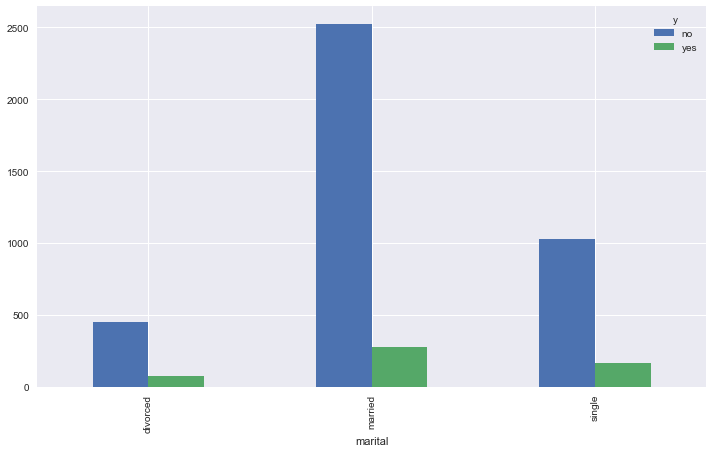

In [85]:
# condering the marital variable
temp2 = pd.crosstab(dataset['marital'], dataset['y'])
temp2.plot(kind='bar')
print(dataset.groupby(['marital']).size()/len(dataset)*100) 

education
primary      14.996682
secondary    51.006415
tertiary     29.860650
unknown       4.136253
dtype: float64


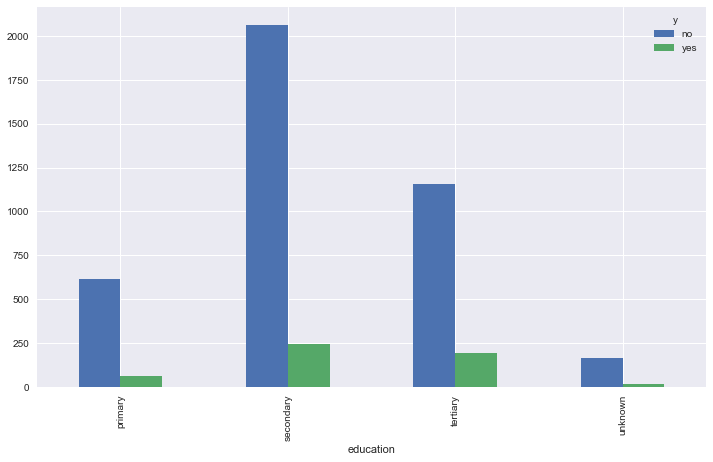

In [86]:
# condering the education variable
temp3 = pd.crosstab(dataset['education'], dataset['y'])
temp3.plot(kind='bar')
print(dataset.groupby(['education']).size()/len(dataset)*100) 

In [87]:
# Fixing 'education' column
dataset_new = impute_unknowns(df=dataset_new, column='education')

default
no     98.318956
yes     1.681044
dtype: float64


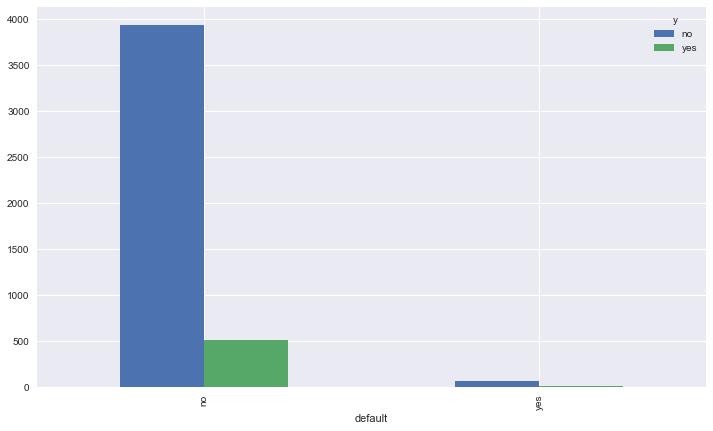

In [88]:
# # condering the default variable
temp4 = pd.crosstab(dataset['default'], dataset['y'])
temp4.plot(kind='bar')
print(dataset.groupby(['default']).size()/len(dataset)*100) 

In [89]:
#dropping variable 'default'
del dataset_new['default']

housing
no     43.397478
yes    56.602522
dtype: float64


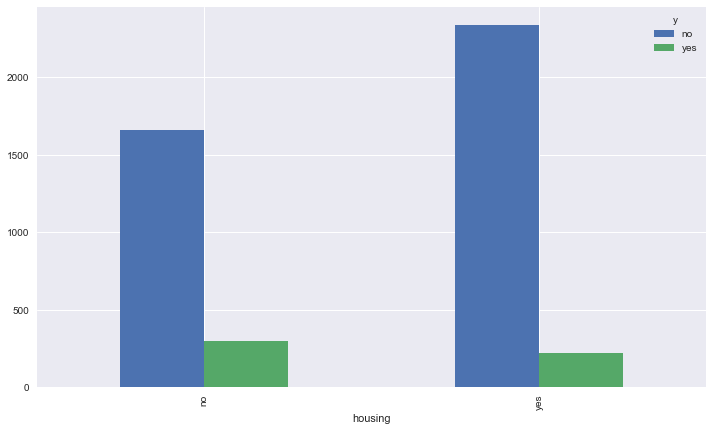

In [90]:
# # condering the housing variable
temp5 = pd.crosstab(dataset['housing'], dataset['y'])
temp5.plot(kind='bar')
print(dataset.groupby(['housing']).size()/len(dataset)*100) 

contact
cellular     64.056625
telephone     6.657819
unknown      29.285556
dtype: float64


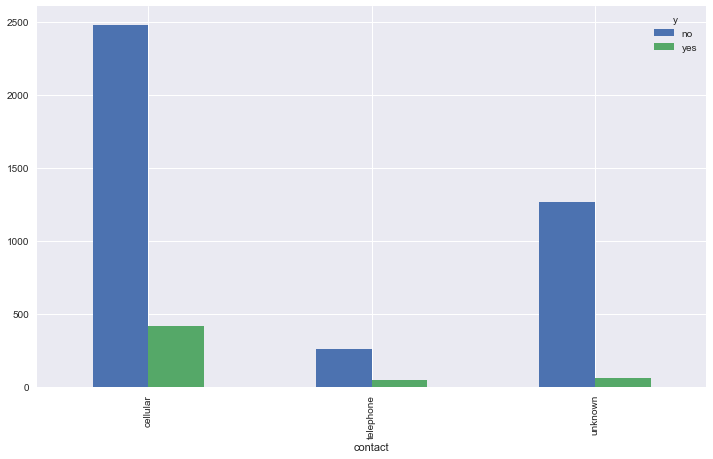

In [91]:
# condering the contact variable
temp6 = pd.crosstab(dataset['contact'], dataset['y'])
temp6.plot(kind='bar')
print(dataset.groupby(['contact']).size()/len(dataset)*100) 

In [92]:
# 'Contact' variable does not have any impact on target variable so we can drop this variable.
del dataset_new['contact']

month
apr     6.480867
aug    14.001327
dec     0.442380
feb     4.910418
jan     3.273612
jul    15.616014
jun    11.745189
mar     1.083831
may    30.922362
nov     8.604291
oct     1.769520
sep     1.150188
dtype: float64


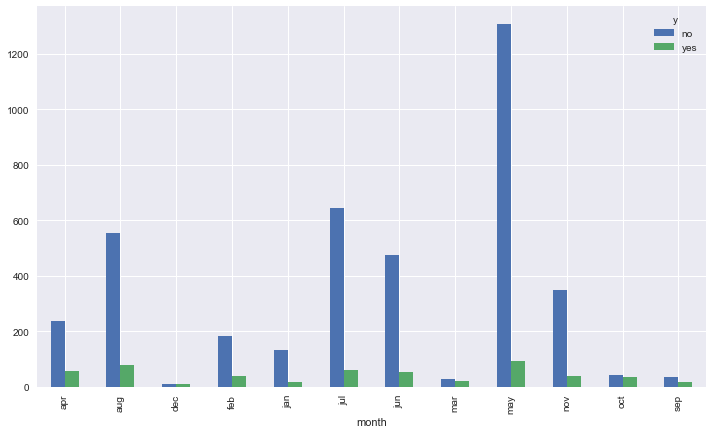

In [93]:
# # condering the month variable
temp7 = pd.crosstab(dataset['month'], dataset['y'])
temp7.plot(kind='bar')
print(dataset.groupby(['month']).size()/len(dataset)*100) 

poutcome
failure    10.838310
other       4.357443
success     2.853351
unknown    81.950896
dtype: float64


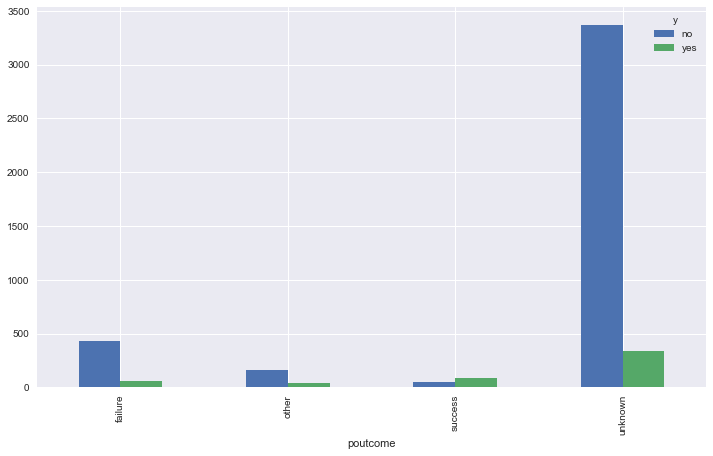

In [94]:
# # condering the poutcome variable
temp8 = pd.crosstab(dataset['poutcome'], dataset['y'])
temp8.plot(kind='bar')
print(dataset.groupby(['poutcome']).size()/len(dataset)*100) 

In [95]:
#dropping variable 'poutcome'
del dataset_new['poutcome']

loan
no     84.715771
yes    15.284229
dtype: float64


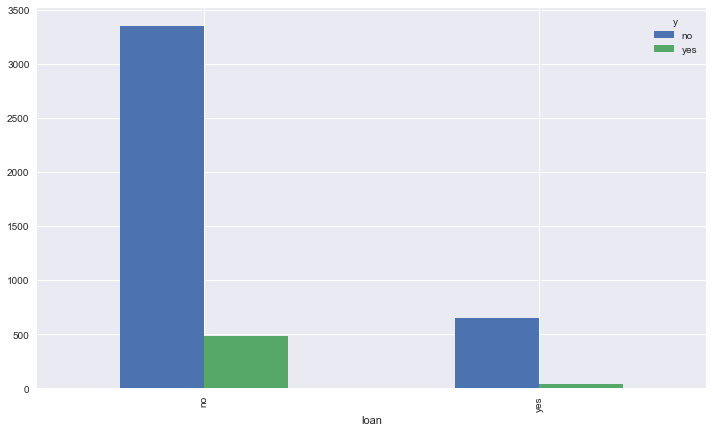

In [96]:
# # condering the loan variable
temp9 = pd.crosstab(dataset['loan'], dataset['y'])
temp9.plot(kind='bar')
print(dataset.groupby(['loan']).size()/len(dataset)*100) 

In [97]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 14 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
balance      4521 non-null float64
housing      4521 non-null object
loan         4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null float64
campaign     4521 non-null float64
pdays        4521 non-null float64
previous     4521 non-null float64
y            4521 non-null object
dtypes: float64(5), int64(2), object(7)
memory usage: 370.9+ KB


In [98]:
#Seperating Target variable from other variables
dataset_Y = dataset_new['y']
dataset_X = dataset_new[dataset_new.columns[0:12]]

In [99]:
#converting Independent Categorical into Numeriacal by creating Dummy variables
dataset_X_dummy = pd.get_dummies(dataset_X)
print(dataset_X_dummy.head())

   age  balance  day  duration  campaign      pdays  job_admin.  \
0   30   1787.0   19      79.0       1.0  -1.000000           0   
1   33   4789.0   11     220.0       1.0  39.766645           0   
2   35   1350.0   16     185.0       1.0  39.766645           0   
3   30   1476.0    3     199.0       4.0  -1.000000           0   
4   59      0.0    5     226.0       1.0  -1.000000           0   

   job_blue-collar  job_entrepreneur  job_housemaid    ...      month_dec  \
0                0                 0              0    ...              0   
1                0                 0              0    ...              0   
2                0                 0              0    ...              0   
3                0                 0              0    ...              0   
4                1                 0              0    ...              0   

   month_feb  month_jan  month_jul  month_jun  month_mar  month_may  \
0          0          0          0          0          0       

In [100]:
X = dataset_X_dummy.values
Y = dataset_Y.values

# Split-out validation dataset
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [101]:
#Scaling the values
X_t = scale(X_train)

#initially lets create 39 components which is actual number of Variables we have
pca = PCA(n_components=39)

pca.fit(X_t)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

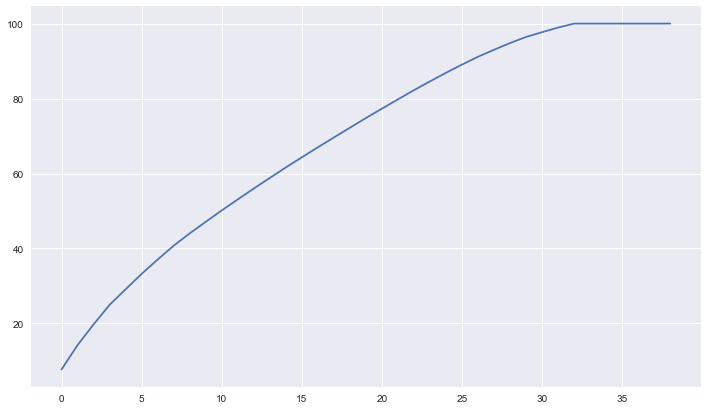

In [102]:
#Cumulative Variance plot
plt.plot(var1)

In [103]:
#Looking at above plot I'm taking 32 variables
pca = PCA(n_components=32)
pca.fit(X_t)
X_train_PC=pca.fit_transform(X_t)

In [104]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [105]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [106]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_PC, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.892154 (0.012783)
LDA: 0.888834 (0.012902)
K-NN: 0.878317 (0.011160)
CART: 0.829913 (0.016516)
NB: 0.845129 (0.013290)
SVM: 0.884680 (0.008915)


In [107]:
# SVM gets highest. 

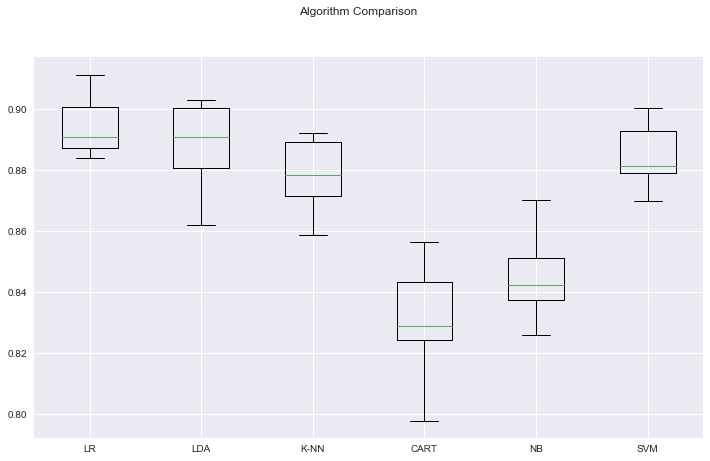

In [108]:
# Comparing various Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [109]:
#Scaling the X_validation data
X_v = scale(X_validation)

pca.fit(X_v)
X_validation_PC=pca.fit_transform(X_v)

In [110]:
# Make predictions on validation dataset by choosing best Algorithm
lr = LogisticRegression()
lr.fit(X_train_PC, Y_train)
predictions = lr.predict(X_validation_PC)
print("Accuracy : ", accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy :  0.868508287293
[[778  23]
 [ 96   8]]
             precision    recall  f1-score   support

         no       0.89      0.97      0.93       801
        yes       0.26      0.08      0.12       104

avg / total       0.82      0.87      0.84       905

